# GEOSTROPHIC BALANCE

In [19]:
%load_ext autoreload
%autoreload 2

from state              import State
from domain             import Domain
from swe_operators      import SweAdvectiveFormOperator
from time_schemes       import rk4
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance, eddy_geostrophic_balance
import operators as op
from vizualization      import trisurf_field, animate_trisurf, surf_interpolated_field, animate_interpolated_surf, \
                               animate_tripcolor, tripcolor_field, imshow_interpolated_field

import numpy as np
from vecmath import calc_mass, calc_c_norm
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

### 1. Без учета коспонент скорости

In [31]:
%%time
import time
from IPython.display import display, clear_output

domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 64, ys = 0.0, ye = LY, ny = 128,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY)]

state = eddy_geostrophic_balance(domains, pcori = PCORI, g = GRAV, h_mean = H_MEAN, scale_h = 1/4, scale_sigma = 50.0)
swe_operator = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp21)

T  = 16 * 24 * 3600
Nt = 8 * 120
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+ str(k))
    state = rk4(state, swe_operator, dt, domains)
    states_list.append(state)

'Time step 960'

CPU times: user 19.8 s, sys: 2.51 s, total: 22.3 s
Wall time: 21 s


<IPython.core.display.Javascript object>


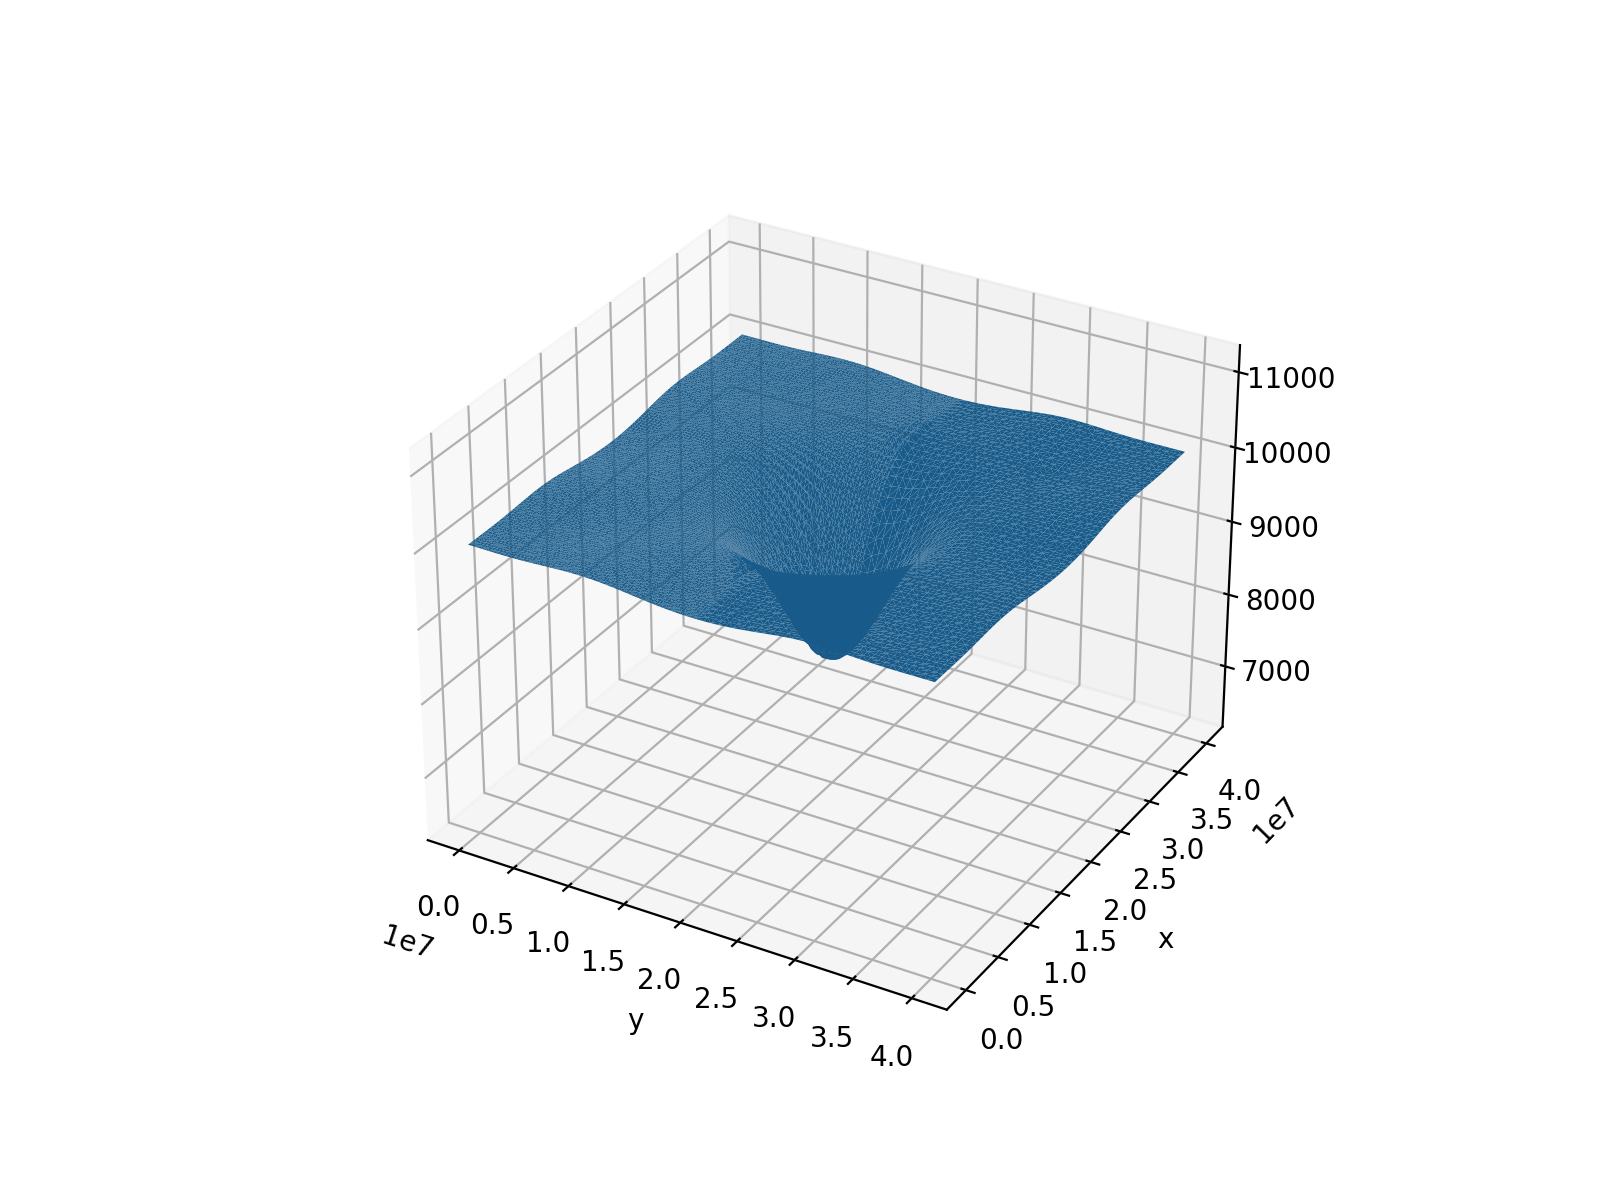

In [34]:
h_list = [state.h for state in states_list]
animate_trisurf(h_list, domains, 4)

In [32]:
import matplotlib.pyplot as plt
c_norms = np.empty([])

for i in range(np.size(states_list)):
    c_norms = np.append(c_norms, calc_c_norm(states_list[0].h-states_list[i].h, domains))

<IPython.core.display.Javascript object>


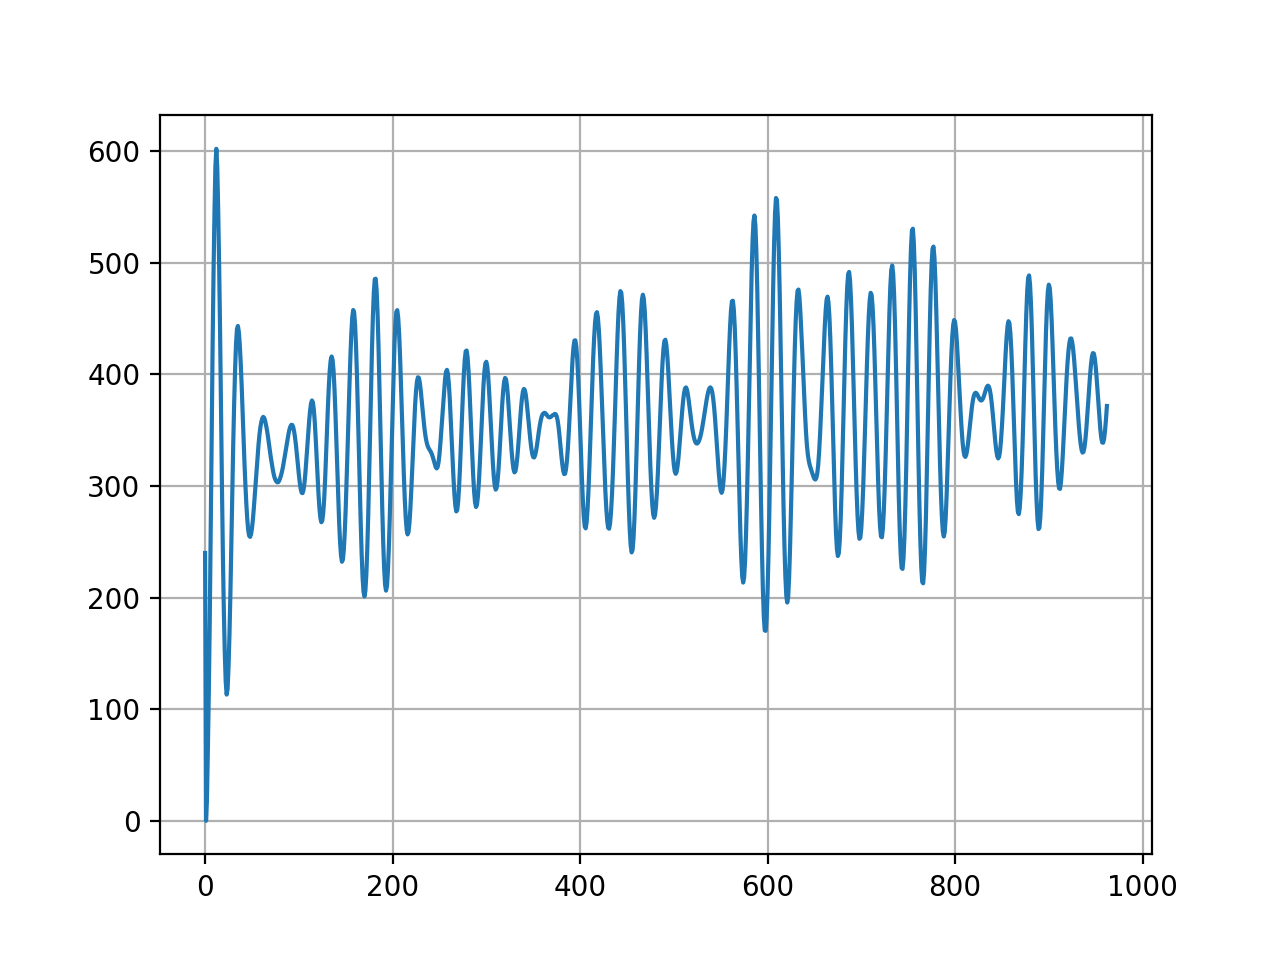

In [36]:
plt.plot(c_norms)
plt.grid()